# Acquire data and deal with large dataset (~ 1.45 GB)

`Depending on where you're reading this notebook, the large 'vehicles.csv' file may not be available alongside it. Should that be the case, the original dataset can be found in https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data `

A great solution for dealing with large datasets without needing to know more complex distributing frameworks, like PySpark, is reading our file using Dask. Dask is a flexible library for parallel computing in Python.

In [1]:
from dask import dataframe as dd
import time

start = time.time()
dask_df = dd.read_csv('vehicles.csv', dtype='object')
end = time.time()
print("Read csv with dask: ",(end-start),"sec")

Read csv with dask:  0.01623845100402832 sec


As you can see, it is capable of reading large datasets in less than a second. However, Dask isn't as advanced as Pandas for data manipulation. Since there would be no point in simply converting our Dask DF to a Pandas DF because of our dataset's large size, we'll take a random sample of it (~5%) and then convert it to Pandas DF.

In [2]:
dask_sample = dask_df.sample(frac=21334/len(dask_df), replace=None, random_state=0)
len(dask_sample)

21335

In [3]:
import pandas as pd

We need to use the Dask DF method _compute()_ in order to convert it into a Pandas DF, simply assigning our Dask sample won't work.

In [4]:
pandas_df = dask_sample.compute()

And here we go! A random sample of our large dataset in a Pandas DataFrame.

In [5]:
pandas_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
5956,7312391203,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,https://anchorage.craigslist.org,22995,2016,chevrolet,malibu lt,like new,4 cylinders,...,full-size,sedan,grey,https://images.craigslist.org/00a0a_8EkW6BOYga...,Frontier Auto Sales wants you to know we're ab...,NaN,ak,61.166252,-149.857916,2021-04-25T09:10:21-0800
8293,7308071331,https://kenai.craigslist.org/ctd/d/anchorage-2...,kenai peninsula,https://kenai.craigslist.org,5988,2010,NaN,Suzuki SX4,NaN,4 cylinders,...,NaN,sedan,grey,https://images.craigslist.org/00k0k_8e7PWjh7nx...,This 2010 Suzuki SX4 4dr Sdn Man LE FWD has be...,NaN,ak,61.1381,-149.86727,2021-04-16T18:07:52-0800
7631,7302864841,https://anchorage.craigslist.org/ctd/d/anchora...,anchorage / mat-su,https://anchorage.craigslist.org,20995,2018,kia,sportage,NaN,NaN,...,NaN,wagon,NaN,https://images.craigslist.org/00O0O_dVc37lIvhB...,2018 Kia Sportage LX AWD 4dr SUV Offered b...,NaN,ak,61.16167,-149.86312,2021-04-06T14:31:39-0800
10979,7316440052,https://phoenix.craigslist.org/nph/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,500,2013,honda,civic,excellent,4 cylinders,...,compact,sedan,white,https://images.craigslist.org/00404_fM055rR9R4...,💥$500 DOWN!💥 ✔2ND CHANCE CREDIT WE ARE HERE FO...,NaN,az,33.3851,-111.8724,2021-05-03T14:22:42-0700
10620,7316543436,https://phoenix.craigslist.org/nph/ctd/d/scott...,phoenix,https://phoenix.craigslist.org,39999,2001,NaN,International F650,good,6 cylinders,...,full-size,truck,white,https://images.craigslist.org/00101_hoOrBo6qin...,This is a 2001 Freightliner FL70 High Top Cab ...,NaN,az,33.623732,-111.920958,2021-05-03T18:11:07-0700


In [6]:
len(pandas_df)

21335

Great. Now, just so that we don't have to run all this again and also be able to export this project with ease, we'll save this Pandas DF as a CSV with a reduced size.

In [7]:
pandas_df.to_csv('vehicles_reduced.csv', index=False) 

# EDA - Exploratory Data Analysis

Let's import our CSV file and make sure it was properly saved.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('vehicles_reduced.csv')
df.sample(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
7307,7316853260,https://springfieldil.craigslist.org/ctd/d/cen...,springfield,https://springfieldil.craigslist.org,10900,2011.0,honda,fit,good,4 cylinders,...,NaN,hatchback,grey,https://images.craigslist.org/01515_fGzZFgefEW...,"2011 Honda Fit 5-Speed MT - $10,900 Drive it h...",NaN,il,42.189800,-91.775800,2021-05-04T13:30:57-0500
9839,7314859541,https://lansing.craigslist.org/ctd/d/flint-z71...,lansing,https://lansing.craigslist.org,13990,2008.0,chevrolet,silverado crew cab,NaN,8 cylinders,...,NaN,NaN,NaN,https://images.craigslist.org/00p0p_jBuw6ZxrJ9...,CHEVROLET SILVERADO!! CLEAN INSIDE & OUT!! 4...,NaN,mi,42.982100,-83.734000,2021-04-30T12:29:32-0400
16819,7303539221,https://erie.craigslist.org/ctd/d/madison-2012...,erie,https://erie.craigslist.org,11995,2012.0,infiniti,g37,NaN,NaN,...,NaN,sedan,blue,https://images.craigslist.org/00K0K_bbkbdbvnTW...,2012 Infiniti G Sedan 37x AWD Offered by: ...,NaN,pa,41.801800,-81.048149,2021-04-08T06:46:30-0400
20769,7316504221,https://seattle.craigslist.org/est/ctd/d/belle...,seattle-tacoma,https://seattle.craigslist.org,28495,2018.0,audi,a4,NaN,4 cylinders,...,compact,sedan,white,https://images.craigslist.org/00707_dWZgSN6Nzn...,Most common questions about this vehicle: Wan...,NaN,wa,47.614533,-122.168798,2021-05-03T16:36:03-0700
17744,7315709627,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,19990,2017.0,subaru,legacy 2.5i premium sedan,good,NaN,...,NaN,sedan,white,https://images.craigslist.org/00P0P_dqrNC20lZD...,Carvana is the safer way to buy a car During t...,NaN,tn,35.970000,-83.940000,2021-05-02T09:25:32-0400


In [10]:
len(df)

21335

Now we will perform an exploratory data analysis (EDA) process, in order to better understand our data, check for outliers and missing values, make transformations and create hypothesis.<br><br>
We'll start by dropping the columns which for sure won't be of use to us.

In [11]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [12]:
cols_to_delete = [
    'id', 'url', 'region', 'region_url', 'title_status', 'VIN',
    'image_url', 'description', 'posting_date', 'lat', 'long'
]
df = df.drop(cols_to_delete, axis=1)

In [13]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'county', 'state'],
      dtype='object')

In [14]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [15]:
df.isna().sum()

price               0
year               60
manufacturer      849
model             238
condition        8807
cylinders        8935
fuel              138
odometer          200
transmission      125
drive            6566
size            15345
type             4608
paint_color      6534
county          21335
state               0
dtype: int64

Ok, so we can see there seems to be a lot of missing information. Here's the approach we'll be using:<br>
- `The top 2 columns with most missing rows, "size" and "county", will be completely dropped, as attempting to impute some value in them will be almost the same as making up data.`<br>
- `Columns with less than 1000 missing values will simply have those rows dropped, since they won't make much difference considering the total size of this dataset.`<br>
- `Columns within the 1000 - 9000 range of missing values will be imputed with different strategies, since the amount of missing values may interfere with the results from generalistic strategies.`<br>

In [16]:
df.columns[df.isna().sum() < 1000]

Index(['price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'transmission', 'state'],
      dtype='object')

In [17]:
df = df.drop(['size', 'county'], axis=1)
df = df.dropna(subset=df.columns[df.isna().sum() < 1000])

In [18]:
len(df)

19891

In [19]:
df.isna().sum()

price              0
year               0
manufacturer       0
model              0
condition       8074
cylinders       8188
fuel               0
odometer           0
transmission       0
drive           6003
type            4168
paint_color     5982
state              0
dtype: int64

Now, we're left with the columns that will have some sort of value imputed into them with some strategy. In order to figure out this strategy, we must understand what each of these columns mean.

In [20]:
df.condition.value_counts()

good         5801
excellent    4665
like new      992
fair          272
new            62
salvage        25
Name: condition, dtype: int64

In [21]:
df.drive.value_counts()

4wd    6360
fwd    4848
rwd    2680
Name: drive, dtype: int64

My hypothesis is that both condition and drive should have a strong correlation with the car's price. That being said, should we confirm this hypothesis, we'll be able to assign more accurate values to rows with missing information, which will help our model further down the line.

In [22]:
# We know sometimes missing values may come as 0 or 1, so we'll be taking care of those as well. No car is going to be free or cost 1.
df = df[(df.price != 0) & (df.price != 1)]

Let's remove the outliers from our numerical columns.

In [23]:
df.dtypes

price              int64
year             float64
manufacturer    category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
transmission    category
drive           category
type            category
paint_color     category
state           category
dtype: object

In [24]:
from functions import remove_outliers

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        df = remove_outliers(df, column)
        print('------------------------------------------------\n')

Column:  price
(-1230.563, 411525.0]    18409
(823046.0, 1234567.0]        2
(411525.0, 823046.0]         0
Name: price, dtype: int64


Column:  price
IIQ:  20490.0 
Q1:  7500.0 
Q3:  27990.0
Inferior threshold:  -23235.0 
Superior threshold:  58725.0
------------------------------------------------

Column:  year
(1989.0, 2022.0]      17685
(1956.0, 1989.0]        355
(1922.901, 1956.0]       46
Name: year, dtype: int64


Column:  year
IIQ:  9.0 
Q1:  2008.0 
Q3:  2017.0
Inferior threshold:  1994.5 
Superior threshold:  2030.5
------------------------------------------------

Column:  odometer
(-10000.0, 3333333.333]       17542
(6666666.667, 10000000.0]         4
(3333333.333, 6666666.667]        1
Name: odometer, dtype: int64


Column:  odometer
IIQ:  97011.5 
Q1:  38275.5 
Q3:  135287.0
Inferior threshold:  -107241.75 
Superior threshold:  280804.25
------------------------------------------------



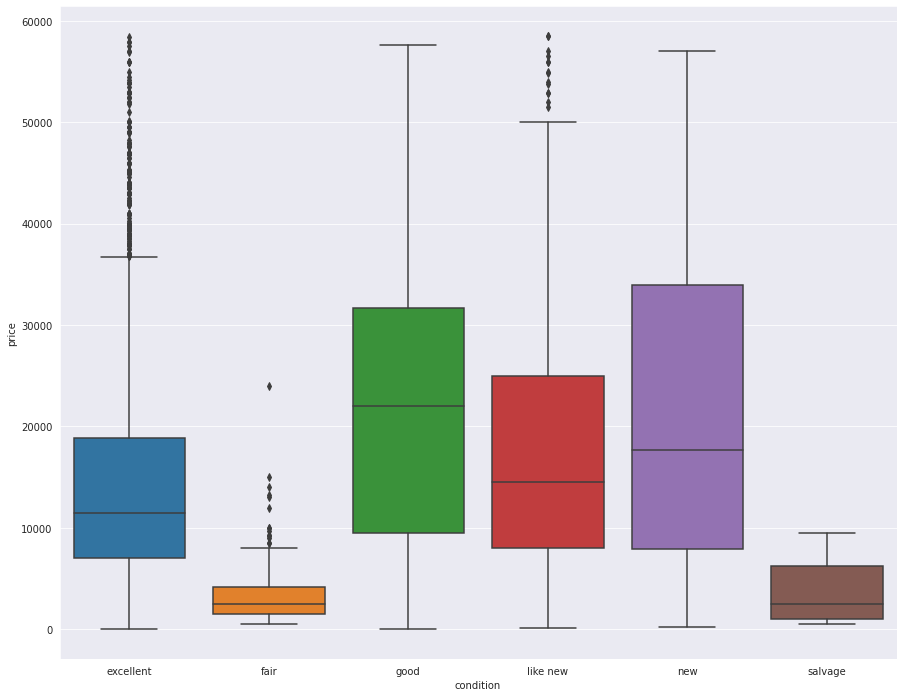

In [25]:
plt.figure(figsize=(15, 12))
with sns.axes_style("darkgrid"):
    g = sns.boxplot(x="condition", y="price", data=df)

So, this (kinda) confirms our hypothesis that the price is strongly correlated with the car's condition. I should admit I thought cars in "excellent", "like new" and "new" conditions would be higher above "good", though. Our result can also be a bit distorted considering we're only looking at roughly 5% of the original dataset. Maybe in your environment, your sample comes out different. Maybe you even have the capacity to process the whole dataset and get to different conclusions. But enough digressing. Let's check how drive affects the price.

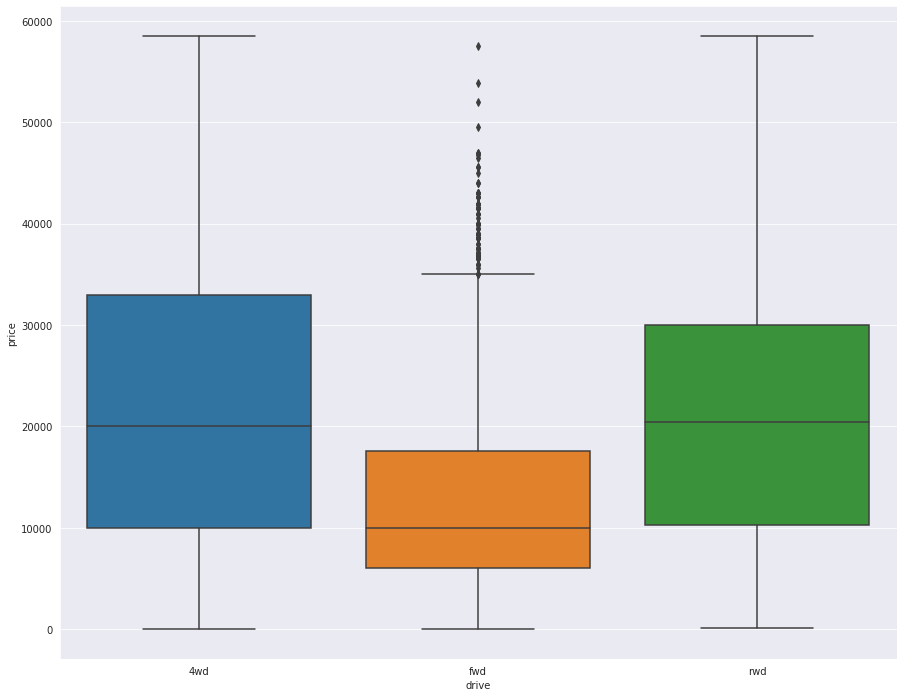

In [26]:
plt.figure(figsize=(15, 12))
with sns.axes_style("darkgrid"):
    g = sns.boxplot(x="drive", y="price", data=df)

Who would know, eh? Turns out 4wd and rwd drive truly add some value to the machine. Great, now we have a bit more orientation as how to input our missing values in both the "condition" and "drive" columns.<br>
<br>
> Obs: it's totally possible to take a deeper look with this logic into a lot more columns, and with more understanding of the data make more accurate imputations, hypothesis and maybe even model tunning. We just won't be doing this here.<br>

I will split our DF into price ranges based on the price variation with each column's value, perform the imputation using the most common label for each column in that price range, then assemble our DF back again. Kinda like a data megazord.

In [27]:
df_conditions = [
    df[df.price <= 5000],
    df[(df.price > 5000) & (df.price <= 10000)],
    df[(df.price > 10000) & (df.price <= 20000)],
    df[(df.price > 20000) & (df.price <= 25000)],
    df[df.price > 25000]
]

for dataframe in df_conditions:
    dataframe['condition'] = dataframe['condition'].fillna(dataframe['condition'].mode()[0])
    
df = pd.concat(df_conditions)
df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
14209,29995,2015.0,chevrolet,silverado 1500 lt,like new,8 cylinders,gas,97282.0,automatic,4wd,truck,NaN,ny
15018,29990,2012.0,toyota,tacoma double cab pickup,good,6 cylinders,gas,43182.0,other,4wd,pickup,white,oh
18962,15999,2017.0,chevrolet,impala,excellent,NaN,gas,99411.0,automatic,NaN,other,white,tx
5663,4500,2001.0,toyota,camry,good,4 cylinders,gas,128001.0,automatic,fwd,sedan,NaN,fl
10763,11950,2011.0,bmw,535i 6-spd sport sedan,excellent,NaN,gas,115522.0,manual,NaN,NaN,NaN,mn


In [28]:
df_drive = [
    df[df.price <= 17000],
    df[df.price > 17000]
]

for dataframe in df_drive:
    dataframe['drive'] = dataframe['drive'].fillna(dataframe['drive'].mode()[0])
    
df = pd.concat(df_drive)
df.sample(5)

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color,state
15340,27590,2018.0,infiniti,qx60 3.5 sport utility,good,6 cylinders,gas,41119.0,automatic,4wd,SUV,blue,ok
5990,5450,2007.0,toyota,sienna,excellent,6 cylinders,gas,175000.0,automatic,fwd,mini-van,blue,fl
15975,10995,2015.0,chevrolet,volt,good,4 cylinders,gas,72381.0,automatic,fwd,hatchback,grey,or
8882,13988,2017.0,nissan,pathfinder,excellent,6 cylinders,gas,166441.0,automatic,4wd,SUV,black,md
12269,29968,2014.0,gmc,sierra 1500 slt,good,NaN,gas,97561.0,automatic,4wd,NaN,NaN,nc


In [29]:
df.isna().sum()

price              0
year               0
manufacturer       0
model              0
condition          0
cylinders       7069
fuel               0
odometer           0
transmission       0
drive              0
type            3548
paint_color     5069
state              0
dtype: int64

Awesome. No missing values for "condition" and "drive" anymore. I've decided to impute the other columns' missing values with ready-to-use imputers later, in our ML pipeline. Feel free to mess around with the data as much as you want, though!<br><br>


Finally, before moving forward to actually implementing some ML models and evaluating them, we'll explore the data a little bit further and try to answer some questions. This is a useful part of the process even if it doesn't help with the model tunning or data preprocessing itself, because in real situations it might help you obtain insights about the business you're working with.<br><br>
Let's first start with checking how the price and odometer values correlate. In theory, we expect them to have a negative correlation. If one is high, then the other should be low. We'll also check if the fuel type for each vehicle has any influence over this.

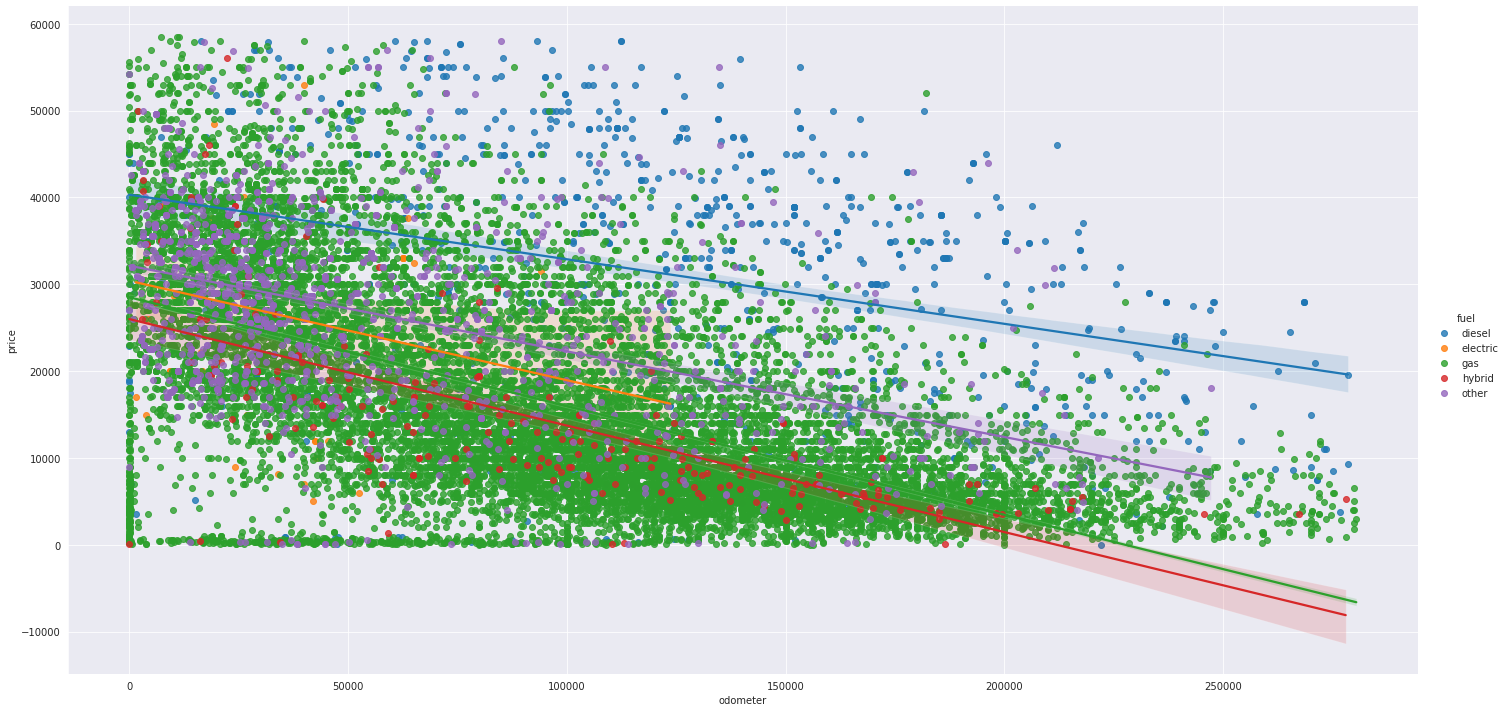

In [30]:
with sns.axes_style("darkgrid"):
    g = sns.lmplot(data=df, x='odometer', y='price', hue='fuel', height=10, aspect=2);

As expected, higher odometers values tend to lower the car's price. Different fuel types don't change this fact, they all follow the same trend. We will now perform the same analysis looking at the year of each car, while also looking at it's transmission type. This time, we expect prices to go up as the years go up.

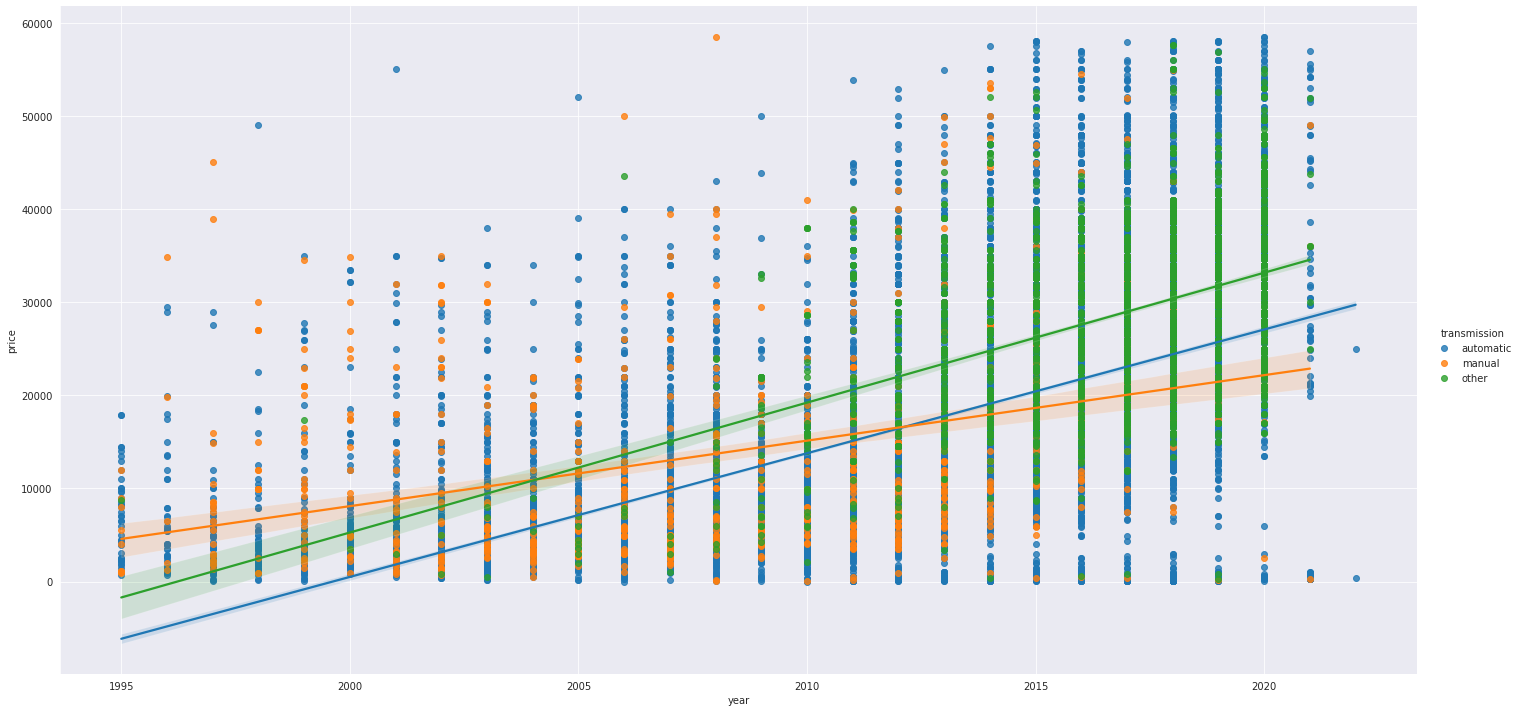

In [31]:
with sns.axes_style("darkgrid"):
    g = sns.lmplot(data=df, x='year', y='price', hue='transmission', height=10, aspect=2);

Ok, so there are some things we can infer from this chart:<br>
- We confirm the hypothesis that newer cars have higher prices, but that's kind of obvious.<br>
- Automatic cars seems to have a higher appreciation than manual cars, but that might be because from 2015 onwards there are much less manual cars for sale. Usually, demand and offer would make so that manual cars become actually more valuable in this scenario, but maybe most people prefer easier to use cars.<br>
- From 2010 onwards cars with "other" types of transmission seem to have risen both in numbers and price. That makes sense, because different types of transmitions started to arrive in the market, with better overall performance. Some examples are Continuously Variable Transmission, Semi-automatic transmission and Dual Clutch Transmission.<br><br>

It seems we actually got some insight from this brief analysis. In a real world situation, we could dig deeper into our data and maybe find out even more useful stuff. Finally, let's proceed to the ML part of this small project.

# Machine Learning models testing and evaluation

### Data Preprocessing

We want to build a model capable of predicting the price for a used car based on the car's features passed to it. Since we want to predict a numeric continuous value, we will be using a few different regression techniques. But first, let's finish preprocessing our data.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [33]:
X = df.loc[:, df.columns != "price"]
y = df.price

First, we impute the last missing values into our data. Here we'll use the "most frequent" strategy because we're dealing with categorical data only. We'll use a copy of X and we'll have to rename our columns for later manipulation, since the imputer assigns numeric values to them.

In [34]:
imputer = SimpleImputer(strategy='most_frequent')
X_copy = X.copy()
X_copy = pd.DataFrame(imputer.fit_transform(X_copy))
X_copy = X_copy.rename({
    0: 'year',
    1: 'brand',
    2: 'model',
    3: 'condition',
    4: 'cylinders',
    5: 'gas',
    6: 'odometer',
    7: 'transmission',
    8: 'drive',
    9: 'type',
    10: 'color',
    11: 'state'
}, axis=1)

In [35]:
X_copy

,year,brand,model,condition,cylinders,gas,odometer,transmission,drive,type,color,state
0,2013.0,honda,civic,excellent,4 cylinders,gas,130000.0,automatic,fwd,sedan,white,az
1,2017.0,dodge,charger,good,6 cylinders,gas,21737.0,automatic,fwd,sedan,white,al
2,1995.0,chevrolet,one ton,good,6 cylinders,gas,130000.0,manual,fwd,sedan,white,ak
3,2005.0,ford,f-150 lariat,fair,8 cylinders,gas,150000.0,automatic,rwd,truck,blue,al
4,2001.0,ford,crown victoria,good,8 cylinders,gas,106554.0,automatic,rwd,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...
17424,2017.0,ram,1500,excellent,8 cylinders,gas,42156.0,automatic,4wd,truck,blue,wi
17425,2011.0,ford,f550 super duty,excellent,6 cylinders,diesel,172000.0,automatic,4wd,pickup,white,wi
17426,2019.0,lincoln,continental reserve,good,6 cylinders,gas,9345.0,other,fwd,sedan,blue,wi
17427,2014.0,ford,super duty f-450 drw,good,10 cylinders,gas,42213.0,automatic,4wd,truck,white,wi


One hot encoding is usually the best for categorical data, except when it generates high cardinality (our case). So we'll combine some columns and transform into numeric the categorical columns that fit this logic. Then we'll apply some Label Encoding, because there's really no way of escaping high cardinality here.

In [36]:
X_copy['brand_model'] = X_copy['brand'] + ' ' + X_copy['model']
X_copy['transmission_drive'] = X_copy['transmission'] + ' ' + X_copy['drive']
X_copy['type_color'] = X_copy['type'] + ' ' + X_copy['color']

X_copy['condition'] = X_copy.condition.map({'new': 0, 'like new': 1, 'excellent': 2, 'good': 3, 'fair': 4, 'salvage': 5})
X_copy['cylinders'] = X_copy.cylinders.map({'3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6, '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12, 'other': 0})

X_copy['year'] = X_copy['year'].astype('int64')
X_copy['odometer'] = X_copy['odometer'].astype('int64')

In [37]:
X_copy = X_copy.drop(columns=['brand', 'model', 'transmission', 'drive', 'type', 'color'], axis=1)

In [38]:
X_copy

,year,condition,cylinders,gas,odometer,state,brand_model,transmission_drive,type_color
0,2013,2,4,gas,130000,az,honda civic,automatic fwd,sedan white
1,2017,3,6,gas,21737,al,dodge charger,automatic fwd,sedan white
2,1995,3,6,gas,130000,ak,chevrolet one ton,manual fwd,sedan white
3,2005,4,8,gas,150000,al,ford f-150 lariat,automatic rwd,truck blue
4,2001,3,8,gas,106554,al,ford crown victoria,automatic rwd,sedan white
...,...,...,...,...,...,...,...,...,...
17424,2017,2,8,gas,42156,wi,ram 1500,automatic 4wd,truck blue
17425,2011,2,6,diesel,172000,wi,ford f550 super duty,automatic 4wd,pickup white
17426,2019,3,6,gas,9345,wi,lincoln continental reserve,other fwd,sedan blue
17427,2014,3,10,gas,42213,wi,ford super duty f-450 drw,automatic 4wd,truck white


In [39]:
cat_cols = [cname for cname in X_copy.columns if X_copy[cname].dtype == 'object']

In [40]:
label_encoder = LabelEncoder()

for col in cat_cols:
    X_copy[col] = label_encoder.fit_transform(X_copy[col])

In [41]:
X_copy

,year,condition,cylinders,gas,odometer,state,brand_model,transmission_drive,type_color
0,2013,2,4,2,130000,3,2053,1,101
1,2017,3,6,2,21737,1,1112,1,101
2,1995,3,6,2,130000,0,821,4,101
3,2005,4,8,2,150000,1,1398,2,104
4,2001,3,8,2,106554,1,1232,2,101
...,...,...,...,...,...,...,...,...,...
17424,2017,2,8,2,42156,48,3422,0,104
17425,2011,2,6,0,172000,48,1636,0,89
17426,2019,3,6,2,9345,48,2776,7,92
17427,2014,3,10,2,42213,48,1767,0,112


Finally, we apply a Standard Scaler to scale our numeric values. We won't bother with column names anymore since we won't manipulate them from here onwards.

In [42]:
scaler = StandardScaler()
X_copy = pd.DataFrame(scaler.fit_transform(X_copy))

In [43]:
X_copy

,0,1,2,3,4,5,6,7,8
0,0.069026,-0.769656,-1.548208,-0.075301,0.641613,-1.367369,-0.041688,-0.350273,0.710470
1,0.808007,0.814652,0.077317,-0.075301,-1.152161,-1.499867,-0.833203,-0.350273,0.710470
2,-3.256388,0.814652,0.077317,-0.075301,0.641613,-1.566116,-1.077975,0.921407,0.710470
3,-1.408936,2.398960,1.702842,-0.075301,0.972987,-1.499867,-0.592636,0.073620,0.787018
4,-2.147917,0.814652,1.702842,-0.075301,0.253144,-1.499867,-0.732266,0.073620,0.710470
...,...,...,...,...,...,...,...,...,...
17424,0.808007,-0.769656,1.702842,-0.075301,-0.813845,1.613835,1.109836,-0.774166,0.787018
17425,-0.300464,-0.769656,0.077317,-2.838283,1.337498,1.613835,-0.392444,-0.774166,0.404280
17426,1.177498,0.814652,0.077317,-0.075301,-1.357480,1.613835,0.566458,2.193086,0.480827
17427,0.253772,0.814652,3.328367,-0.075301,-0.812901,1.613835,-0.282255,-0.774166,0.991145


### Decision Tree Regression

In [44]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, train_size=0.7)

In [46]:
dtrmodel_1 = DecisionTreeRegressor(max_depth=3)
dtrmodel_2 = DecisionTreeRegressor(max_depth=6)
dtrmodel_3 = DecisionTreeRegressor(max_depth=10)

In [47]:
dtrmodel_1.fit(X_train, y_train)
dtrmodel_2.fit(X_train, y_train)
dtrmodel_3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [48]:
preds_1 = dtrmodel_1.predict(X_test)
preds_2 = dtrmodel_2.predict(X_test)
preds_3 = dtrmodel_3.predict(X_test)

In [49]:
mse_dtr_1 = mean_squared_error(y_test, preds_1)
mse_dtr_2 = mean_squared_error(y_test, preds_2)
mse_dtr_3 = mean_squared_error(y_test, preds_3)
score_dtr_3 = dtrmodel_3.score(X_test, y_test)

In [50]:
print('MSE for Decision Tree Regression with max depth 3: ', mse_dtr_1)
print('MSE for Decision Tree Regression with max depth 6: ', mse_dtr_2)
print('MSE for Decision Tree Regression with max depth 10: ', mse_dtr_3)
print('Score for Decision Tree Regression with max depth 10: ', score_dtr_3)

MSE for Decision Tree Regression with max depth 3:  79428611.58840743
MSE for Decision Tree Regression with max depth 6:  61399506.72250635
MSE for Decision Tree Regression with max depth 10:  56093616.19040116
Score for Decision Tree Regression with max depth 10:  0.6596252720824631


### Elastic Net Regression

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, train_size=0.7)

In [53]:
elastic_1 = ElasticNet(l1_ratio=1, alpha=0.7)
elastic_2 = ElasticNet()

In [54]:
elastic_1.fit(X_train, y_train)
elastic_2.fit(X_train, y_train)

ElasticNet()

In [55]:
preds_1 = elastic_1.predict(X_test)
preds_2 = elastic_2.predict(X_test)

In [56]:
mse_elastic_1 = mean_squared_error(y_test, preds_1)
mse_elastic_2 = mean_squared_error(y_test, preds_2)
score_elastic_1 = elastic_1.score(X_test, y_test)
score_elastic_2 = elastic_2.score(X_test, y_test)

In [57]:
print('MSE for Elastic Net Regression with mixed params: ', mse_elastic_1)
print('MSE for Elastic Net Regression with default params: ', mse_elastic_2)
print('Score for Decision Tree Regression with mixed params: ', score_elastic_1)
print('Score for Decision Tree Regression with default params: ', score_elastic_2)

MSE for Elastic Net Regression with mixed params:  74573753.4647338
MSE for Elastic Net Regression with default params:  82730737.5619375
Score for Decision Tree Regression with mixed params:  0.5500070770476155
Score for Decision Tree Regression with default params:  0.5007862058182675


We did get an improvement with mixed params over the default ones, but overall our Elastic Net model performed badly. Let's test just one more: the famous Linear Regression.

### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, train_size=0.7)

In [60]:
lrmodel_1 = LinearRegression()

In [61]:
lrmodel_1.fit(X_train, y_train)

LinearRegression()

In [62]:
preds_1 = lrmodel_1.predict(X_test)

In [63]:
mse_lrmodel_1 = mean_squared_error(preds_1, y_test)

In [64]:
score_lrmodel_1 = lrmodel_1.score(X_test, y_test)

In [65]:
print('MSE for Linear Regression: ', mse_lrmodel_1)
print('Score for Linear Regression: ', score_lrmodel_1)

MSE for Linear Regression:  74623128.75679275
Score for Linear Regression:  0.5457203430395974


In [66]:
print('Model with the highest score: Decision Tree Regression')
print('Score: ', score_dtr_3)

Model with the highest score: Decision Tree Regression
Score:  0.6596252720824631


### Model Conclusion:
- Decision Tree Regression, with max_depth = 10, got the highest score within our tests.
- Other regression models can be tested and other parameters can be tested with current models, it depends on the goal and understanding of the person doing it

# How could we use this project to improve a hypothetical used car sales business?
- By understanding how much each feature of a car affects it's price, then calculating accordingly in order to check if investing a certain amount of money into said car in order to increase it's value (e.g., improving it's transmission or changing it's color) will result in more revenue
- Being able to predict monthly costs and future profits based on cars bought that month and their features